### 1. Import libraries

In [1]:
import numpy
import pandas

import import_ipynb
import sklearn_models
import utility_figures
import Algorithm_of_MoTLM_with_known_points_of_interest

importing Jupyter notebook from sklearn_models.ipynb
importing Jupyter notebook from data_analysis.ipynb
importing Jupyter notebook from utility_figures.ipynb
importing Jupyter notebook from Algorithm_of_MoTLM_with_known_points_of_interest.ipynb
importing Jupyter notebook from utility_functions.ipynb


### 2. Binary linear classifiers

#### 2.1. Generate Synthetic Data

REGION 1 n_samples : 386, REGION 2 n_samples : 234, REGION EXT n_samples : 772
Positive class size REGION 1 : 193, Negative class size outside region : 193
Positive class size REGION 2 : 117, Negative class size outside region : 117
Positive class size REGION EXT : 386, Negative class size outside region : 386


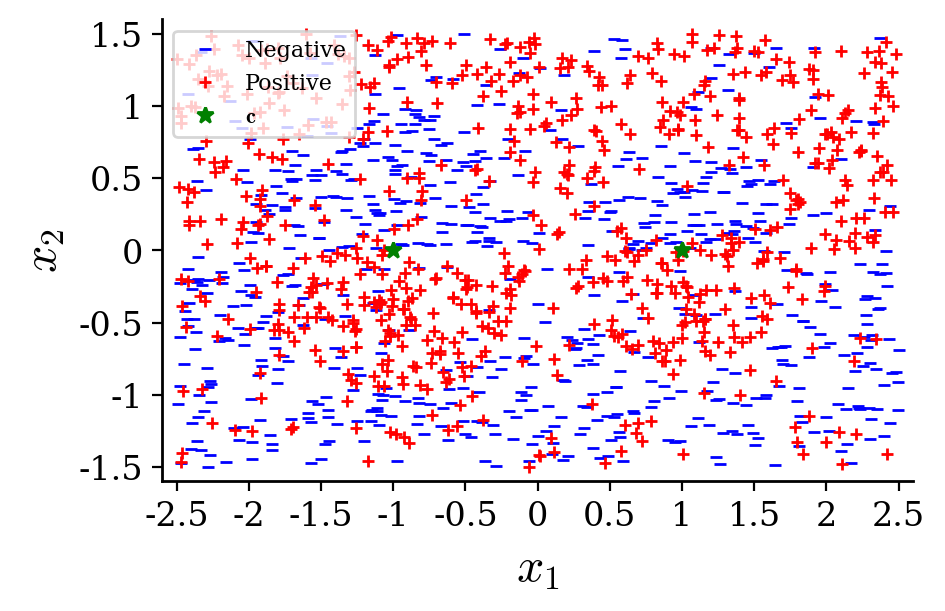

In [2]:
Ntrials = 2000
df_1, target_name, X0_1, BETA_1, situation_1 = utility_figures.DataGenerating_clf(Case=1, LengthRectangle=2.5, WidthRectangle=1.5, Ntrials=Ntrials, lang='en')
utility_figures.PlotDistribution_Synthetic_data_clf_gn(data=df_1, Xc=X0_1.values, situation=situation_1, learning_type_flag='Chosen', lang='en')

REGION 1 n_samples : 311, REGION 2 n_samples : 57, REGION 3 n_samples : 297, REGION EXT n_samples : 580
Positive class size REGION 1 : 142, Negative class size outside region : 169
Positive class size REGION 2 : 57, Negative class size outside region : 0
Positive class size REGION 3 : 152, Negative class size outside region : 145
Positive class size REGION EXT : 290, Negative class size outside region : 290


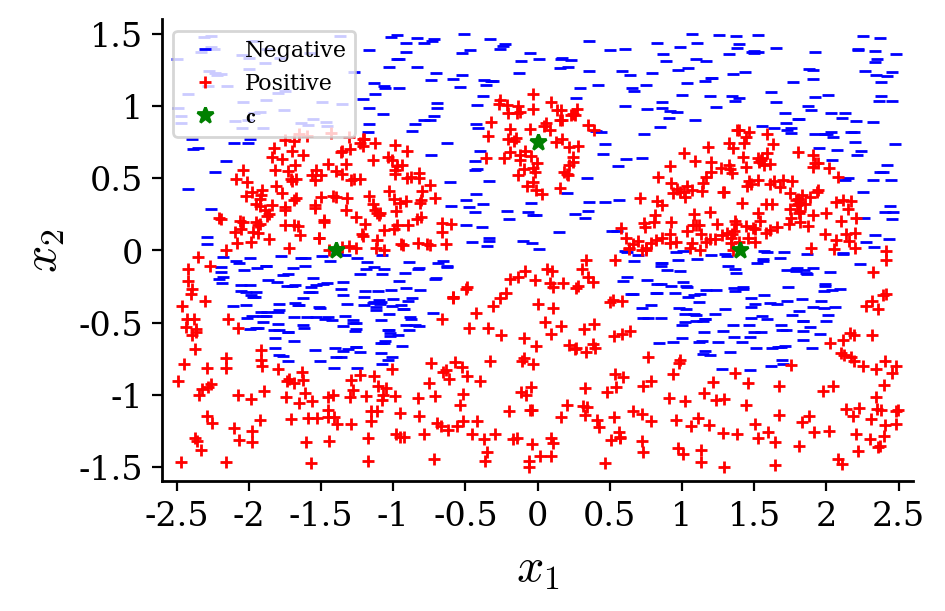

In [3]:
Ntrials = 2000
df_2, target_name, X0_2, BETA_2, situation_2 = utility_figures.DataGenerating_clf(Case=2, LengthRectangle=2.5, WidthRectangle=1.5, Ntrials=Ntrials, lang='en')
utility_figures.PlotDistribution_Synthetic_data_clf_gn(data=df_2, Xc=X0_2.values, situation=situation_2, learning_type_flag='Chosen', lang='en')

#### 2.2. Single Model (SVM Classifier)

##### Parameters Setting

In [13]:
train_size=0.70
C_param=100
C_validation=True
times=10
return_flag='complex'

##### Situation 1

In [14]:
# for rbf kernel
C_param_rbf, summary_rbf = sklearn_models.classifier_svm(df_1.copy(), target_name, synthetic_data_flag=True, train_size=train_size, kernel='rbf', C_param=C_param, C_validation=C_validation, times=times, return_flag=return_flag)
summary_rbf

*********************************************** The SVMs ***********************************************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, kernel = rbf, C_validation = True, times = 10
C_param =974.0


,Accuracy,F1_score,Precision_score,Std_accuracy
Training set,76.30,75.93,70.30,1.07
Validation set,75.69,75.50,69.87,1.99
Testing set,73.97,73.64,67.68,1.86


In [15]:
# for linear kernel
C_param, w, b, summary, X_tr, X_tt, ytrain_true, ytest_true, ytrain_pred, ytest_pred = sklearn_models.classifier_svm(df_1.copy(), target_name, synthetic_data_flag=True, train_size=train_size, kernel='linear', C_param=C_param, C_validation=C_validation, times=times, return_flag=return_flag)
summary

*********************************************** The SVMs ***********************************************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, kernel = linear, C_validation = True, times = 10
w = [0.02681714 0.85464757], b = -0.03009, C_param =974.0


,Accuracy,F1_score,Precision_score,Std_accuracy
Training set,53.22,52.58,51.73,0.92
Validation set,54.93,53.92,53.09,3.29
Testing set,54.31,53.85,52.15,2.10


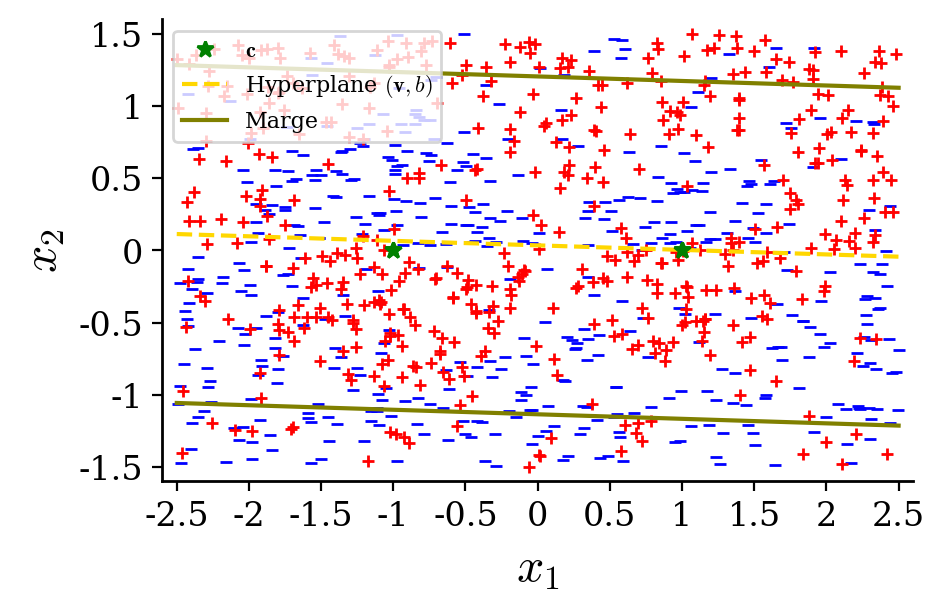

In [16]:
utility_figures.visualize_hyperplane_gn(X=X_tr, y=ytrain_true, Xc=X0_1.values, v=w, b=b, situation=situation_1, jeu='Jeu d\'entraînement', lang='en')


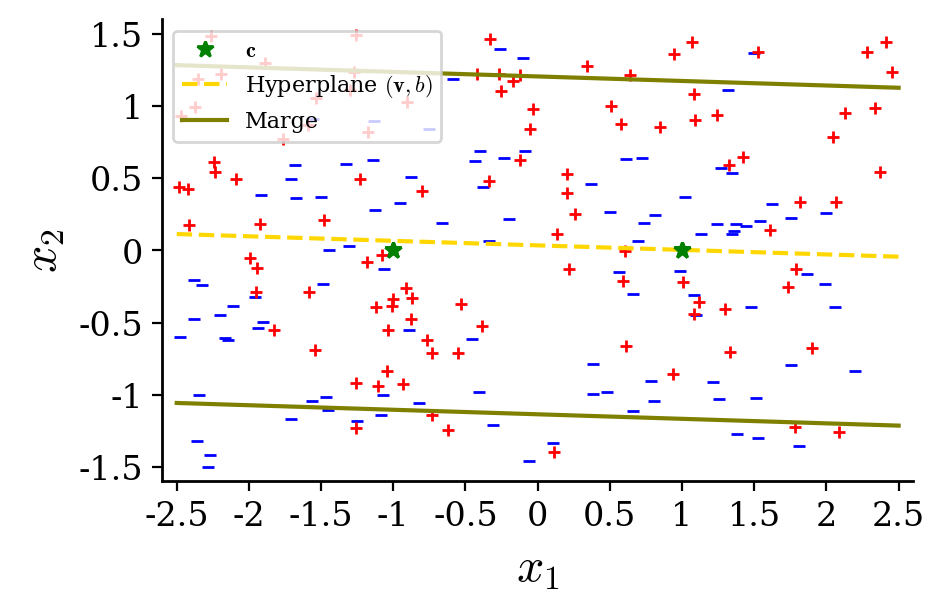

In [17]:
utility_figures.visualize_hyperplane_gn(X=X_tt, y=ytest_true, Xc=X0_1.values, v=w, b=b, situation=situation_1, jeu='Jeu de test', lang='en')

##### Situation 2

In [18]:
# for rbf kernel
C_param_rbf_, summary_rbf_ = sklearn_models.classifier_svm(df_2.copy(), target_name, synthetic_data_flag=True, train_size=train_size, kernel='rbf', C_param=C_param, C_validation=C_validation, times=times, return_flag=return_flag)
summary_rbf_

*********************************************** The SVMs ***********************************************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, kernel = rbf, C_validation = True, times = 10
C_param =1959.75


,Accuracy,F1_score,Precision_score,Std_accuracy
Training set,95.83,95.96,94.12,0.51
Validation set,94.97,95.09,93.05,1.73
Testing set,93.80,94.06,91.42,1.63


In [19]:
# for linear kernel
C_param_, w_, b_, summary_, X_tr_, X_tt_, ytrain_true_, ytest_true_, ytrain_pred_, ytest_pred_ = sklearn_models.classifier_svm(df_2.copy(), target_name, synthetic_data_flag=True, train_size=train_size, kernel='linear', C_param=C_param, C_validation=C_validation, times=times, return_flag=return_flag)
summary_

*********************************************** The SVMs ***********************************************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, kernel = linear, C_validation = True, times = 10
w = [ 0.00208057 -0.88065728], b = 0.076956, C_param =2395.25


,Accuracy,F1_score,Precision_score,Std_accuracy
Training set,49.35,51.74,51.08,1.33
Validation set,50.05,51.81,51.46,3.76
Testing set,50.64,52.12,52.23,2.52


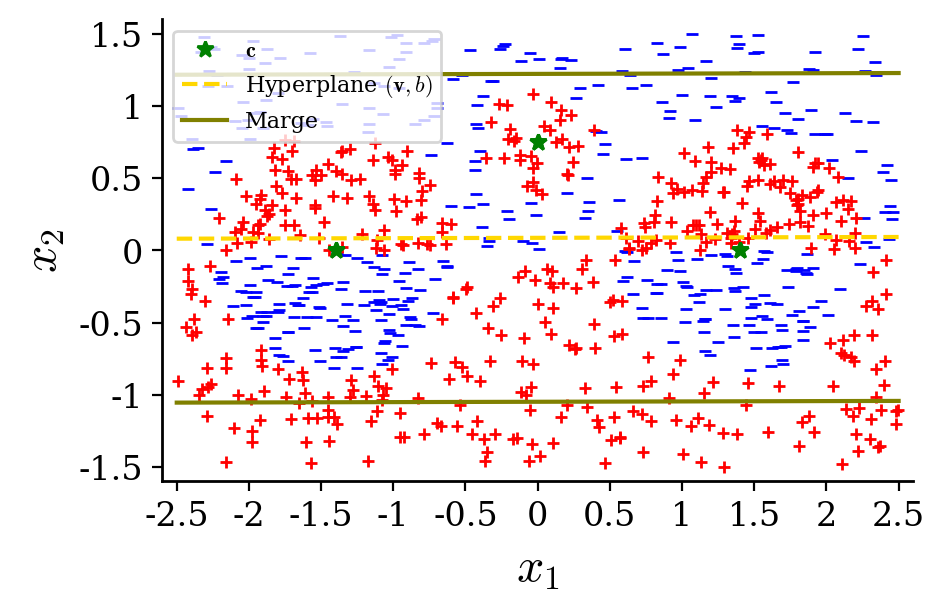

In [20]:
utility_figures.visualize_hyperplane_gn(X=X_tr_, y=ytrain_true_, Xc=X0_2.values, v=w_, b=b_, situation=situation_2, jeu='Jeu d\'entraînement', lang='en')


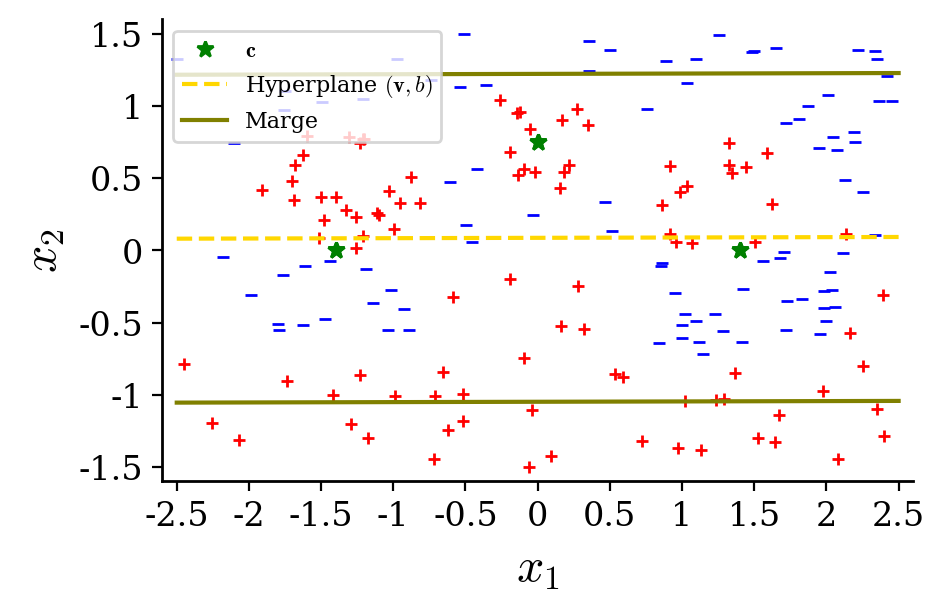

In [21]:
utility_figures.visualize_hyperplane_gn(X=X_tt_, y=ytest_true_, Xc=X0_2.values, v=w_, b=b_, situation=situation_2, jeu='Jeu de test', lang='en')


#### 2.3. Generalization Of Mixture Of Linear Experts Into Many Regions

##### Parameters Setting

In [3]:
train_size=0.70
lr=0.1
lambda_param=300
max_iters=2000
lambda_validation=True
times=10#times
return_flag='complex'

##### Situation 1

In [5]:
X0_1_enc, lambda_param, W, w_ext, MU, mu_ext, K, TAU, BETA, summary, X_train, X_test, Mat_dists_train, Mat_dists_test, ytrain_true, ytest_true, ytrain_pred, ytest_pred = Algorithm_of_MoTLM_with_known_points_of_interest.Mixture_clf(df_1.copy(), target_name, X0_1, synthetic_data_flag=True, train_size=train_size, lr=lr, lambda_param=lambda_param, max_iters=max_iters, lambda_validation=lambda_validation, times=times, return_flag=return_flag)


***************** Mixtures of transparent local models with known points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, class_weights = None, lambda_validation = True, times = 10


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [06:10<00:00, 21.77s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [06:12<55:51, 372.34s/it]

W = [[-0.18369509 -4.4497384 ]
 [-0.37074057 -3.88109266]], MU = [-0.164814  0.278387], lambda_param = 1095.75
w_ext = [0.14921239 4.87286919], mu_ext = -0.261717
SIGMA = [0.346223 0.285865], sigma_ext = 0.581472


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [06:48<00:00, 24.04s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [13:02<52:36, 394.59s/it]

W = [[-0.09368376 -5.27544398]
 [-0.90590565 -4.72050438]], MU = [-0.233897  1.058836], lambda_param = 2069.75
w_ext = [0.24770524 5.52440092], mu_ext = -0.392582
SIGMA = [0.202526 0.221962], sigma_ext = 0.428289


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [06:14<00:00, 22.05s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [19:18<45:03, 386.27s/it]

W = [[-0.25101626 -5.51541608]
 [-0.57296466 -5.10384096]], MU = [-0.382486  0.460251], lambda_param = 2191.5
w_ext = [0.20166792 5.2083316 ], mu_ext = -0.123327
SIGMA = [0.444083 0.453557], sigma_ext = 0.651076


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [06:17<00:00, 22.18s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [25:37<38:18, 383.09s/it]

W = [[ 0.38894578 -3.93633675]
 [-0.06143462 -3.50678799]], MU = [-0.022166  0.189088], lambda_param = 852.25
w_ext = [0.16274253 4.36710261], mu_ext = -0.003703
SIGMA = [0.101552 0.162   ], sigma_ext = 0.43981


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [06:48<00:00, 24.01s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [32:28<32:46, 393.23s/it]

W = [[-0.16798769 -5.74950982]
 [-0.39466868 -5.41768884]], MU = [-0.175602  0.300543], lambda_param = 2313.25
w_ext = [0.13426584 5.51850641], mu_ext = -0.396905
SIGMA = [0.380244 0.410187], sigma_ext = 0.657018


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [06:19<00:00, 22.32s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [38:50<25:57, 389.33s/it]

W = [[-0.1334021  -4.61467203]
 [-0.20074005 -4.14929199]], MU = [-0.18313   0.491539], lambda_param = 1217.5
w_ext = [0.1565856 4.6545774], mu_ext = -0.412743
SIGMA = [0.343258 0.335036], sigma_ext = 0.561768


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [06:20<00:00, 22.36s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [45:10<19:19, 386.58s/it]

W = [[ 0.09789483 -5.61014487]
 [-0.32258002 -5.3280614 ]], MU = [-0.082793  0.374232], lambda_param = 2313.25
w_ext = [0.30327651 5.04765414], mu_ext = -0.211395
SIGMA = [0.351778 0.374269], sigma_ext = 0.593743


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [06:02<00:00, 21.30s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [51:15<12:38, 379.49s/it]

W = [[-0.07986805 -5.534546  ]
 [-0.32981916 -4.9381367 ]], MU = [-0.204504  0.341772], lambda_param = 2069.75
w_ext = [0.19514637 4.84533109], mu_ext = 0.083622
SIGMA = [0.313403 0.321414], sigma_ext = 0.532277


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [06:37<00:00, 23.38s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [57:53<06:25, 385.39s/it]

W = [[ 0.05543348 -4.68012157]
 [-0.57083922 -4.03008039]], MU = [-0.085715  0.661997], lambda_param = 1217.5
w_ext = [-0.16837202  4.55283314], mu_ext = 0.191062
SIGMA = [0.360635 0.305656], sigma_ext = 0.592572


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [06:17<00:00, 22.19s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [1:04:11<00:00, 385.19s/it]

W = [[ 0.02266336 -4.65958796]
 [-0.04018461 -3.89766877]], MU = [-0.110662  0.053766], lambda_param = 1095.75
w_ext = [0.23504643 4.72265474], mu_ext = -0.166002
SIGMA = [0.31726  0.313399], sigma_ext = 0.639875


In [6]:
summary

,Accuracy,F1_score,Precision_score,Gibbs_risk,Risk_bound,Std_accuracy
Training set,78.655,78.559,72.614,0.2918,0.3236,0.6944
Validation set,80.525,80.552,74.852,0.2822,0.3140,1.4988
Testing set,78.229,78.305,71.910,0.2941,0.3259,2.0542


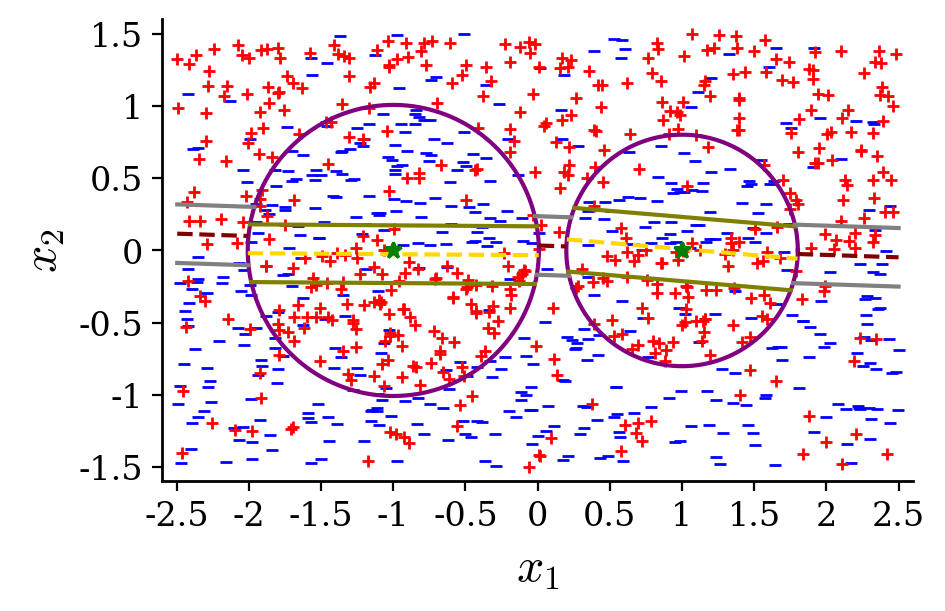

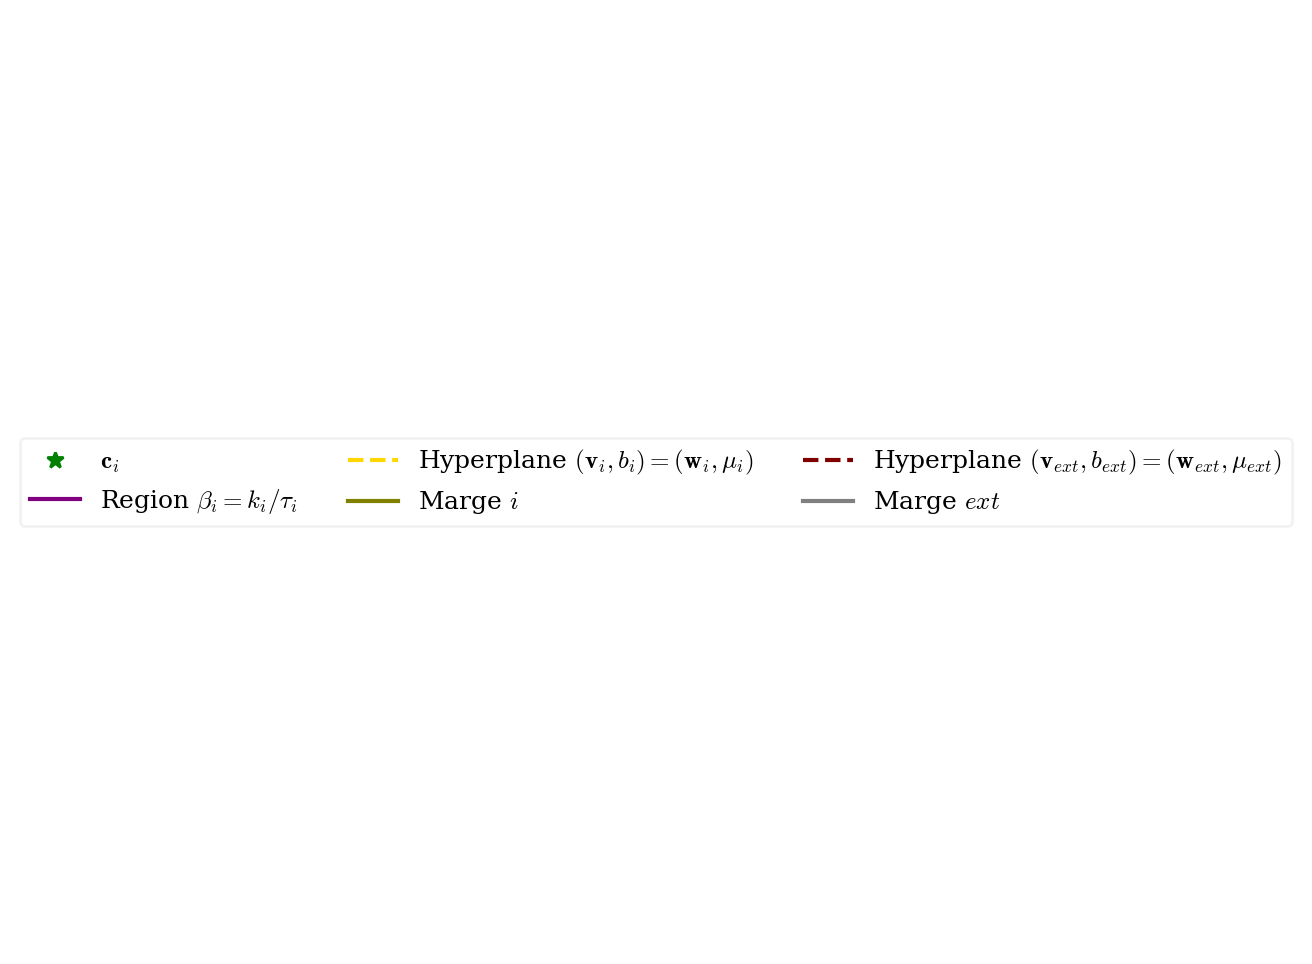

In [7]:
utility_figures.visualize_hybrid_hyperplane_gn(X=X_train, y=ytrain_true, Xcenter=X0_1_enc, dist_type='euclidean', Mat_dists=Mat_dists_train, V=W, v_ext=w_ext, B=MU, b_ext=mu_ext, BETA=BETA, situation=situation_1, jeu='Jeu d\'entraînement', option=False, learning_type_flag='Chosen', lang='en')

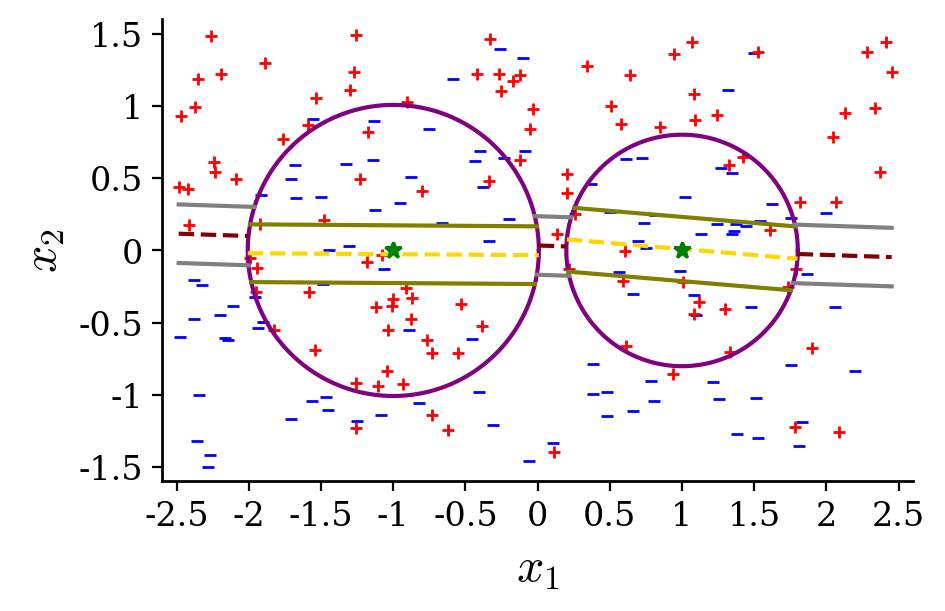

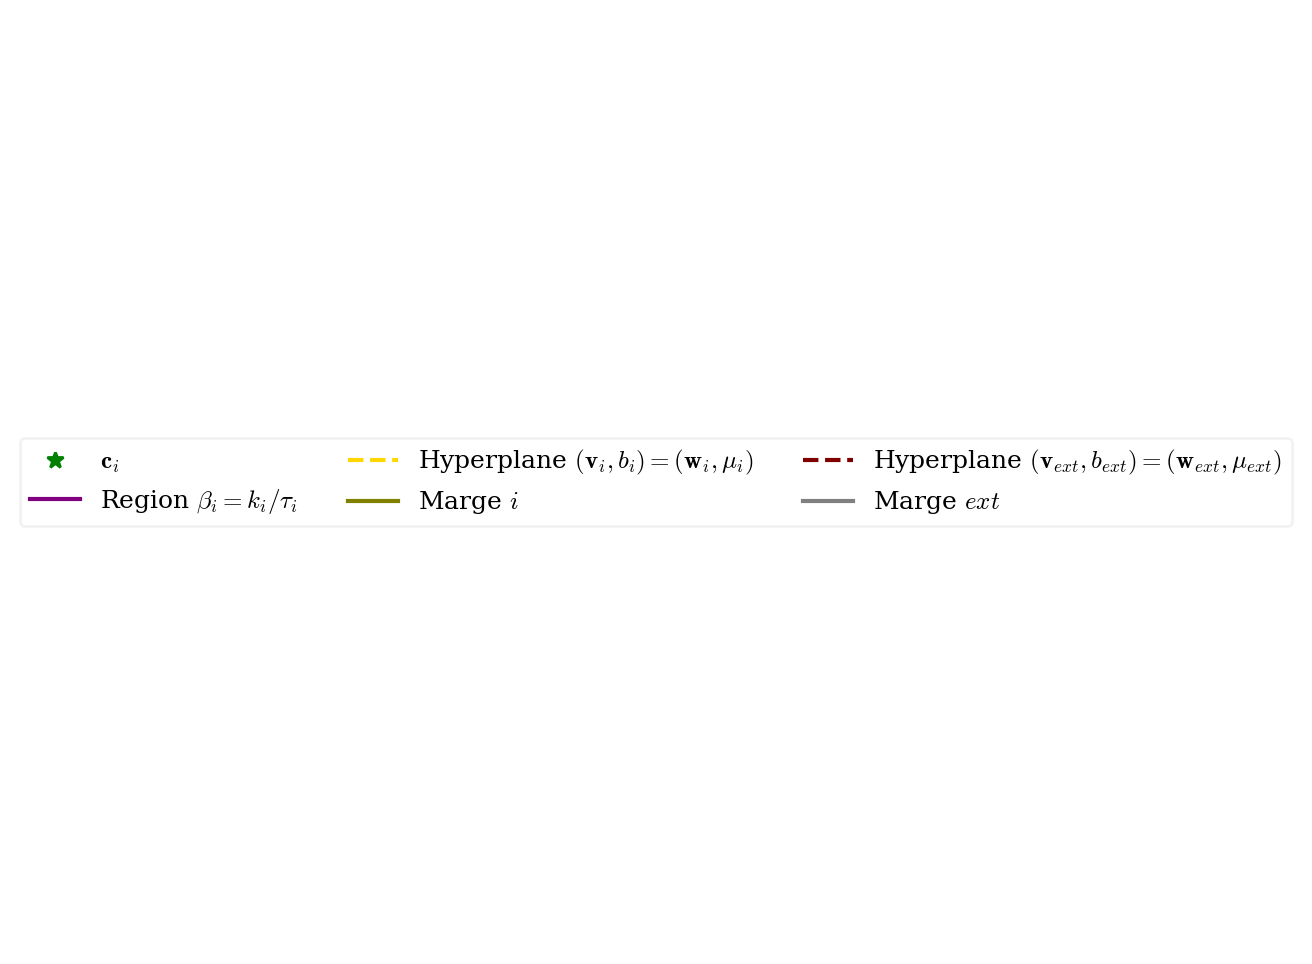

In [8]:
utility_figures.visualize_hybrid_hyperplane_gn(X=X_test, y=ytest_true, Xcenter=X0_1_enc, dist_type='euclidean', Mat_dists=Mat_dists_test, V=W, v_ext=w_ext, B=MU, b_ext=mu_ext, BETA=BETA, situation=situation_1, jeu='Jeu de test', option=False, learning_type_flag='Chosen', lang='en')

In [4]:
n = 5
list_of_n_points = numpy.zeros(n)
Acc_train, Acc_val, Acc_test = numpy.zeros(n), numpy.zeros(n), numpy.zeros(n)
Risk_train, Risk_val, Risk_test = numpy.zeros(n), numpy.zeros(n), numpy.zeros(n)

for i in numpy.arange(1, n+1):
    print(f'***************************** For n = {i} ********************************')
    if i == 1:
        X0_1 = pandas.DataFrame({"var_1": [-1], "var_2": [0]})
    elif i == 2:
        new_row = pandas.DataFrame({"var_1": [1], "var_2": [0]})
        X0_1 = pandas.concat([X0_1, new_row], ignore_index=True)
    elif i == 3:
        new_row = pandas.DataFrame({"var_1": [-2], "var_2": [-1]})
        X0_1 = pandas.concat([X0_1, new_row], ignore_index=True)
    elif i == 4:
        new_row = pandas.DataFrame({"var_1": [2], "var_2": [1]})
        X0_1 = pandas.concat([X0_1, new_row], ignore_index=True)
    elif i == 5:
        new_row = pandas.DataFrame({"var_1": [-1], "var_2": [0.5]})
        X0_1 = pandas.concat([X0_1, new_row], ignore_index=True)
    #elif i == 6:
    #    new_row = pandas.DataFrame({"var_1": [-1], "var_2": [-0.5]})
    #    X0_1 = pandas.concat([X0_1, new_row], ignore_index=True)
    #elif i == 7:
    #    new_row = pandas.DataFrame({"var_1": [0.5], "var_2": [0]})
    #    X0_1 = pandas.concat([X0_1, new_row], ignore_index=True)
    
    X0_1_enc, lambda_param, W, w_ext, MU, mu_ext, K, TAU, BETA, summary = Algorithm_of_MoTLM_with_known_points_of_interest.Mixture_clf(df_1.copy(), target_name, X0_1, synthetic_data_flag=True, train_size=train_size, lr=lr, lambda_param=lambda_param, max_iters=max_iters, lambda_validation=lambda_validation, times=times, return_flag='simple')
    list_of_n_points[i-1] = i
    Acc_train[i-1], Acc_val[i-1], Acc_test[i-1] = summary['Accuracy'][summary.index[0]], summary['Accuracy'][summary.index[1]], summary['Accuracy'][summary.index[2]]
    Risk_train[i-1], Risk_val[i-1], Risk_test[i-1] = summary['Risk_bound'][summary.index[0]], summary['Risk_bound'][summary.index[1]], summary['Risk_bound'][summary.index[2]]

***************************** For n = 1 ********************************
***************** Mixtures of transparent local models with known points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, class_weights = None, lambda_validation = True, times = 10


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 17/17 [01:44<00:00,  6.17s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [01:45<15:51, 105.76s/it]

W = [[-0.38734129 -5.96037746]], MU = [-0.265226], lambda_param = 2678.5
w_ext = [0.41081682 5.65637975], mu_ext = 1.744943
SIGMA = [0.373752], sigma_ext = 0.504333


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 17/17 [01:29<00:00,  5.28s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [03:16<12:54, 96.79s/it] 

W = [[-0.15194738 -6.03495907]], MU = [-0.294038], lambda_param = 4139.5
w_ext = [0.75640355 5.75518891], mu_ext = 2.006122
SIGMA = [0.383458], sigma_ext = 0.463412


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 17/17 [01:23<00:00,  4.89s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [04:40<10:35, 90.85s/it]

W = [[-0.30922806 -6.3646339 ]], MU = [-0.418228], lambda_param = 3896.0
w_ext = [0.5839345 4.9117701], mu_ext = 1.877991
SIGMA = [0.420079], sigma_ext = 0.546912


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 17/17 [01:29<00:00,  5.27s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [06:10<09:04, 90.72s/it]

W = [[ 0.31851838 -6.79784963]], MU = [-0.105458], lambda_param = 4626.5
w_ext = [-0.26870707  5.82652432], mu_ext = -2.308423
SIGMA = [0.345222], sigma_ext = 0.31679


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 17/17 [01:31<00:00,  5.39s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [07:42<07:36, 91.32s/it]

W = [[-0.19085165 -6.67908376]], MU = [-0.253235], lambda_param = 4870.0
w_ext = [-0.35135868  5.90848069], mu_ext = -2.557118
SIGMA = [0.404795], sigma_ext = 0.453308


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 17/17 [01:29<00:00,  5.24s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [09:12<06:03, 90.80s/it]

W = [[-0.24085065 -5.6596016 ]], MU = [-0.300813], lambda_param = 4383.0
w_ext = [-0.45488617  6.56534209], mu_ext = -2.798654
SIGMA = [0.323408], sigma_ext = 0.421275


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 17/17 [01:25<00:00,  5.06s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [10:39<04:28, 89.43s/it]

W = [[ 0.07350242 -6.27309516]], MU = [-0.063072], lambda_param = 4383.0
w_ext = [-0.02905215  6.42771657], mu_ext = -2.899362
SIGMA = [0.344574], sigma_ext = 0.40301


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 17/17 [01:30<00:00,  5.34s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [12:10<03:00, 90.12s/it]

W = [[-0.10749194 -5.92973341]], MU = [-0.251105], lambda_param = 4139.5
w_ext = [0.56014451 5.64865851], mu_ext = 2.035998
SIGMA = [0.367195], sigma_ext = 0.566663


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 17/17 [01:28<00:00,  5.23s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [13:40<01:29, 89.90s/it]

W = [[ 0.05462757 -4.64675242]], MU = [-0.085198], lambda_param = 1217.5
w_ext = [0.00675799 3.80220289], mu_ext = 1.233864
SIGMA = [0.505657], sigma_ext = 0.675121


Tuning Lambda (10 random restarts for each lambda) : 100%|██████████| 17/17 [01:31<00:00,  5.40s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [15:13<00:00, 91.32s/it]


W = [[-0.08422929 -6.94021039]], MU = [-0.198199], lambda_param = 4626.5
w_ext = [0.59486536 5.46867778], mu_ext = 1.968988
SIGMA = [0.304066], sigma_ext = 0.306754
***************************** For n = 2 ********************************
***************** Mixtures of transparent local models with known points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, class_weights = None, lambda_validation = True, times = 10


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [03:42<00:00, 13.08s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [03:43<33:29, 223.25s/it]

W = [[-0.18369509 -4.4497384 ]
 [-0.37074057 -3.88109266]], MU = [-0.164814  0.278387], lambda_param = 1095.75
w_ext = [0.14921239 4.87286919], mu_ext = -0.261717
SIGMA = [0.346223 0.285865], sigma_ext = 0.581472


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [03:37<00:00, 12.77s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [07:21<29:22, 220.34s/it]

W = [[-0.09368376 -5.27544398]
 [-0.90590565 -4.72050438]], MU = [-0.233897  1.058836], lambda_param = 2069.75
w_ext = [0.24770524 5.52440092], mu_ext = -0.392582
SIGMA = [0.202526 0.221962], sigma_ext = 0.428289


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [03:24<00:00, 12.02s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [10:46<24:53, 213.38s/it]

W = [[-0.25101626 -5.51541608]
 [-0.57296466 -5.10384096]], MU = [-0.382486  0.460251], lambda_param = 2191.5
w_ext = [0.20166792 5.2083316 ], mu_ext = -0.123327
SIGMA = [0.444083 0.453557], sigma_ext = 0.651076


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [03:35<00:00, 12.70s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [14:23<21:28, 214.78s/it]

W = [[ 0.38894578 -3.93633675]
 [-0.06143462 -3.50678799]], MU = [-0.022166  0.189088], lambda_param = 852.25
w_ext = [0.16274253 4.36710261], mu_ext = -0.003703
SIGMA = [0.101552 0.162   ], sigma_ext = 0.43981


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [03:45<00:00, 13.25s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [18:09<18:14, 218.84s/it]

W = [[-0.16798769 -5.74950982]
 [-0.39466868 -5.41768884]], MU = [-0.175602  0.300543], lambda_param = 2313.25
w_ext = [0.13426584 5.51850641], mu_ext = -0.396905
SIGMA = [0.380244 0.410187], sigma_ext = 0.657018


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [03:34<00:00, 12.61s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [21:45<14:30, 217.74s/it]

W = [[-0.1334021  -4.61467203]
 [-0.20074005 -4.14929199]], MU = [-0.18313   0.491539], lambda_param = 1217.5
w_ext = [0.1565856 4.6545774], mu_ext = -0.412743
SIGMA = [0.343258 0.335036], sigma_ext = 0.561768


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [03:37<00:00, 12.80s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [25:23<10:53, 217.96s/it]

W = [[ 0.09789483 -5.61014487]
 [-0.32258002 -5.3280614 ]], MU = [-0.082793  0.374232], lambda_param = 2313.25
w_ext = [0.30327651 5.04765414], mu_ext = -0.211395
SIGMA = [0.351778 0.374269], sigma_ext = 0.593743


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [03:30<00:00, 12.39s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [28:55<07:11, 215.89s/it]

W = [[-0.07986805 -5.534546  ]
 [-0.32981916 -4.9381367 ]], MU = [-0.204504  0.341772], lambda_param = 2069.75
w_ext = [0.19514637 4.84533109], mu_ext = 0.083622
SIGMA = [0.313403 0.321414], sigma_ext = 0.532277


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [03:20<00:00, 11.78s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [32:16<03:31, 211.23s/it]

W = [[ 0.05543348 -4.68012157]
 [-0.57083922 -4.03008039]], MU = [-0.085715  0.661997], lambda_param = 1217.5
w_ext = [-0.16837202  4.55283314], mu_ext = 0.191062
SIGMA = [0.360635 0.305656], sigma_ext = 0.592572


Tuning Lambda (20 random restarts for each lambda) : 100%|██████████| 17/17 [03:21<00:00, 11.87s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [35:38<00:00, 213.85s/it]


W = [[ 0.02266336 -4.65958796]
 [-0.04018461 -3.89766877]], MU = [-0.110662  0.053766], lambda_param = 1095.75
w_ext = [0.23504643 4.72265474], mu_ext = -0.166002
SIGMA = [0.31726  0.313399], sigma_ext = 0.639875
***************************** For n = 3 ********************************
***************** Mixtures of transparent local models with known points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, class_weights = None, lambda_validation = True, times = 10


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [05:22<00:00, 18.97s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [05:23<48:32, 323.57s/it]

W = [[-0.25889529 -4.68151905]
 [-0.37561286 -4.31047302]
 [ 0.88654843  0.42235255]], MU = [-0.098431  0.290686 -0.454808], lambda_param = 1379.8333333333333
w_ext = [0.15323222 5.23879433], mu_ext = -0.250354
SIGMA = [0.221611 0.278145 0.411749], sigma_ext = 0.390191


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [05:08<00:00, 18.14s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [10:33<42:02, 315.29s/it]

W = [[-0.05752406 -4.9177677 ]
 [-0.81212243 -4.28817892]
 [ 0.53415587  0.2846472 ]], MU = [-0.196567  0.944926 -0.269282], lambda_param = 1623.3333333333333
w_ext = [0.24036507 5.19966432], mu_ext = -0.327525
SIGMA = [0.225274 0.185042 0.437429], sigma_ext = 0.488307


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [05:10<00:00, 18.26s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [15:44<36:34, 313.47s/it]

W = [[-0.18496228 -5.06251178]
 [-0.50725179 -4.37980711]
 [ 0.14749367  0.04602158]], MU = [-0.316576  0.383256 -0.039413], lambda_param = 1461.0
w_ext = [0.19233039 4.75066307], mu_ext = -0.100773
SIGMA = [0.375996 0.354766 0.53203 ], sigma_ext = 0.613185


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [05:16<00:00, 18.60s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [21:01<31:29, 314.84s/it]

W = [[ 0.25427929 -5.13772606]
 [-0.07801056 -4.64727339]
 [ 0.75126377  0.32845918]], MU = [-0.027384  0.162529 -0.340569], lambda_param = 1623.3333333333333
w_ext = [0.18845783 5.07231945], mu_ext = -0.017452
SIGMA = [0.337415 0.29218  0.581664], sigma_ext = 0.635817


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [05:16<00:00, 18.60s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [26:18<26:17, 315.59s/it]

W = [[-0.13698887 -5.38417568]
 [-0.37781931 -4.74027544]
 [ 0.8694827   0.28492182]], MU = [-0.150288  0.269276 -0.294235], lambda_param = 1623.3333333333333
w_ext = [0.1398261 4.7197528], mu_ext = -0.339176
SIGMA = [0.321962 0.366353 0.494379], sigma_ext = 0.559386


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [05:09<00:00, 18.23s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [31:29<20:55, 313.95s/it]

W = [[-0.2170656  -5.11718494]
 [-0.23148478 -4.66870737]
 [ 0.96339451  0.52748291]], MU = [-0.171043  0.540955 -0.519167], lambda_param = 1623.3333333333333
w_ext = [0.16804057 4.87124439], mu_ext = -0.445452
SIGMA = [0.364024 0.37982  0.582847], sigma_ext = 0.516792


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [05:08<00:00, 18.17s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [36:38<15:37, 312.46s/it]

W = [[ 0.06614989 -3.65003693]
 [-0.20649995 -2.82640168]
 [ 0.7308114   0.30357002]], MU = [-0.031393  0.215895 -0.328007], lambda_param = 568.1666666666666
w_ext = [0.19516623 3.93658334], mu_ext = -0.050561
SIGMA = [0.532786 0.550186 0.663232], sigma_ext = 0.710877


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [05:16<00:00, 18.60s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [41:55<10:27, 313.93s/it]

W = [[-0.07751437 -5.22720803]
 [-0.36935635 -4.50768925]
 [ 0.42571539  0.22051904]], MU = [-0.190256  0.314488 -0.192796], lambda_param = 1623.3333333333333
w_ext = [0.18589585 4.6221894 ], mu_ext = 0.09451
SIGMA = [0.366065 0.365982 0.443072], sigma_ext = 0.583532


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [05:15<00:00, 18.59s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [47:12<05:14, 314.80s/it]

W = [[ 0.06342251 -5.0780735 ]
 [-0.62833327 -4.5524843 ]
 [ 1.28751017  0.62067281]], MU = [-0.096605  0.738545 -0.671611], lambda_param = 1623.3333333333333
w_ext = [-0.26382582  4.68772156], mu_ext = 0.425548
SIGMA = [0.328183 0.348697 0.49191 ], sigma_ext = 0.579921


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [05:18<00:00, 18.72s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [52:31<00:00, 315.14s/it]


W = [[ 0.03476398 -4.53530093]
 [-0.04131445 -3.69502779]
 [ 0.74839184  0.35870972]], MU = [-0.107819  0.078279 -0.373137], lambda_param = 974.0
w_ext = [0.2159614  4.50725224], mu_ext = -0.129255
SIGMA = [0.391739 0.265232 0.544801], sigma_ext = 0.617346
***************************** For n = 4 ********************************
***************** Mixtures of transparent local models with known points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, class_weights = None, lambda_validation = True, times = 10


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 17/17 [07:41<00:00, 27.12s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [07:41<1:09:16, 461.87s/it]

W = [[-0.10258748 -2.68101985]
 [-0.33406606 -1.92596715]
 [ 0.7028484   0.33728984]
 [ 1.17803353  0.53409261]], MU = [ 0.034975  0.124984 -0.355426  0.568178], lambda_param = 304.375
w_ext = [-0.19244059  2.95965382], mu_ext = -0.263094
SIGMA = [0.213183 0.395803 0.526957 0.494462], sigma_ext = 0.46265


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 17/17 [07:21<00:00, 25.95s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [15:03<1:00:01, 450.16s/it]

W = [[-0.03411237 -4.437958  ]
 [-0.64261236 -3.82711533]
 [ 1.06061406  0.48591261]
 [ 1.5135663   0.71835283]], MU = [-0.162937  0.794991 -0.503133  0.736365], lambda_param = 1156.625
w_ext = [0.11383341 4.35916493], mu_ext = -0.357556
SIGMA = [0.295167 0.350377 0.534838 0.505011], sigma_ext = 0.513277


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 17/17 [07:17<00:00, 25.76s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [22:22<51:54, 444.98s/it]  

W = [[-0.14161887 -4.65847938]
 [-0.45180845 -4.00683628]
 [ 0.86608171  0.36019157]
 [ 1.37144305  0.64005472]], MU = [-0.271534  0.369537 -0.346058  0.664935], lambda_param = 1156.625
w_ext = [0.12750187 4.43960511], mu_ext = -0.185438
SIGMA = [0.324873 0.356044 0.511892 0.481551], sigma_ext = 0.527372


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 17/17 [07:28<00:00, 26.39s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [29:52<44:40, 446.75s/it]

W = [[ 0.31184723 -3.54029971]
 [-0.08380718 -3.00399996]
 [ 0.9483492   0.44133585]
 [ 1.43376859  0.66074113]], MU = [-0.065982  0.198159 -0.479035  0.707901], lambda_param = 608.75
w_ext = [-0.10800966  3.56798893], mu_ext = -0.161185
SIGMA = [0.236374 0.331257 0.513073 0.495577], sigma_ext = 0.507269


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 17/17 [07:33<00:00, 26.70s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [37:26<37:28, 449.61s/it]

W = [[-0.10068284 -4.80661322]
 [-0.32197331 -4.1291674 ]
 [ 1.03542751  0.41666612]
 [ 1.48436446  0.68948191]], MU = [-0.140058  0.264229 -0.443191  0.708558], lambda_param = 1156.625
w_ext = [0.00731753 4.34110389], mu_ext = -0.426838
SIGMA = [0.295089 0.327739 0.509392 0.477889], sigma_ext = 0.523212


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 17/17 [07:25<00:00, 26.23s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [44:54<29:56, 449.05s/it]

W = [[-0.17278309 -4.63497207]
 [-0.23660224 -4.09612752]
 [ 0.95513216  0.47386887]
 [ 1.59819082  0.74408913]], MU = [-0.124254  0.474879 -0.428733  0.78025 ], lambda_param = 1217.5
w_ext = [-0.01741614  4.35711539], mu_ext = -0.66916
SIGMA = [0.405345 0.332719 0.515202 0.515708], sigma_ext = 0.486694


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 17/17 [07:24<00:00, 26.15s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [52:19<22:23, 447.77s/it]

W = [[ 0.05648361 -2.46295381]
 [-0.13439728 -1.58920278]
 [ 0.68761092  0.34849525]
 [ 1.18554489  0.55349648]], MU = [-0.018074  0.092216 -0.333801  0.583022], lambda_param = 243.5
w_ext = [-0.19126947  2.71590303], mu_ext = -0.16806
SIGMA = [0.577144 0.587172 0.650212 0.646987], sigma_ext = 0.671845


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 17/17 [07:35<00:00, 26.80s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [59:57<15:01, 450.75s/it]

W = [[-0.01217056 -4.59714774]
 [-0.22045079 -3.9290009 ]
 [ 0.61480515  0.30339303]
 [ 1.57828999  0.74495492]], MU = [-0.119407  0.18921  -0.28964   0.771134], lambda_param = 1217.5
w_ext = [0.07982717 4.47932212], mu_ext = -0.098809
SIGMA = [0.134607 0.022595 0.272097 0.307583], sigma_ext = 0.260765


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 17/17 [07:19<00:00, 25.85s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [1:07:17<07:27, 447.48s/it]

W = [[ 0.1220563  -4.58320799]
 [-0.58707594 -3.95276576]
 [ 0.40406636  0.18094375]
 [ 1.57880376  0.73336957]], MU = [-0.136454  0.640522 -0.205444  0.777807], lambda_param = 1217.5
w_ext = [-0.3509767   4.42529835], mu_ext = -0.198774
SIGMA = [0.311529 0.251356 0.466085 0.48044 ], sigma_ext = 0.613149


Tuning Lambda (40 random restarts for each lambda) : 100%|██████████| 17/17 [07:40<00:00, 27.08s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [1:14:58<00:00, 449.87s/it]


W = [[ 0.04545455 -4.62863985]
 [-0.01723379 -3.93084495]
 [ 0.58365598  0.27956792]
 [ 1.59193941  0.76917415]], MU = [-0.095845  0.08445  -0.285291  0.783732], lambda_param = 1156.625
w_ext = [0.10076249 4.49286995], mu_ext = -0.447425
SIGMA = [0.195644 0.104557 0.451917 0.451283], sigma_ext = 0.331671
***************************** For n = 5 ********************************
***************** Mixtures of transparent local models with known points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, class_weights = None, lambda_validation = True, times = 10


Tuning Lambda (50 random restarts for each lambda) : 100%|██████████| 17/17 [08:25<00:00, 29.73s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [08:26<1:15:54, 506.11s/it]

W = [[-0.16706839 -3.25145206]
 [-0.34035332 -2.40059231]
 [ 0.81490793  0.3849142 ]
 [ 1.26216067  0.56258094]
 [ 0.25255084 -0.13070656]], MU = [ 2.60000e-05  1.94195e-01 -4.14160e-01  5.88546e-01 -2.43194e-01], lambda_param = 438.3
w_ext = [-0.1338946   3.40869912], mu_ext = -0.302762
SIGMA = [0.557809 0.552073 0.63765  0.622809 0.650428], sigma_ext = 0.645002


Tuning Lambda (50 random restarts for each lambda) : 100%|██████████| 17/17 [08:17<00:00, 29.29s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [16:44<1:06:54, 501.81s/it]

W = [[-0.02802043 -4.00778117]
 [-0.55136711 -3.23439497]
 [ 0.28817308  0.164663  ]
 [ 1.46589671  0.68336543]
 [ 0.57582963 -0.3218287 ]], MU = [-0.141878  0.665969 -0.146158  0.710304 -0.5856  ], lambda_param = 827.9000000000001
w_ext = [0.08330657 4.05035462], mu_ext = -0.436826
SIGMA = [0.362757 0.266621 0.48804  0.54172  0.669197], sigma_ext = 0.439585


Tuning Lambda (50 random restarts for each lambda) : 100%|██████████| 17/17 [08:21<00:00, 29.53s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [25:07<58:35, 502.28s/it]  

W = [[-0.09700771 -4.1654925 ]
 [-0.41295535 -3.43332329]
 [ 0.77088957  0.35797201]
 [ 1.45341895  0.68884787]
 [ 0.59380805 -0.328175  ]], MU = [-0.263253  0.299105 -0.362203  0.710627 -0.599249], lambda_param = 827.9000000000001
w_ext = [-8.82408856e-04  3.96844654e+00], mu_ext = -0.251124
SIGMA = [0.332984 0.235312 0.492534 0.502241 0.522482], sigma_ext = 0.507072


Tuning Lambda (50 random restarts for each lambda) : 100%|██████████| 17/17 [08:37<00:00, 30.41s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [33:45<50:50, 508.45s/it]

W = [[ 0.22794227 -4.33240147]
 [-0.12792093 -3.70589405]
 [ 1.05042053  0.48131575]
 [ 1.53799134  0.69474403]
 [ 0.5059379  -0.28079282]], MU = [-0.011336  0.137032 -0.519591  0.759767 -0.517144], lambda_param = 974.0
w_ext = [-0.03257477  4.01851607], mu_ext = -0.190529
SIGMA = [0.40213  0.232336 0.455559 0.499877 0.502521], sigma_ext = 0.551381


Tuning Lambda (50 random restarts for each lambda) : 100%|██████████| 17/17 [08:24<00:00, 29.70s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [42:11<42:17, 507.50s/it]

W = [[-0.13631405 -4.59178682]
 [-0.30745176 -3.78710882]
 [ 1.09691964  0.48348908]
 [ 1.60311958  0.7204399 ]
 [ 0.42807159 -0.24071673]], MU = [-0.075966  0.230492 -0.536328  0.762836 -0.420251], lambda_param = 974.0
w_ext = [-0.17863337  3.86525428], mu_ext = -0.472478
SIGMA = [0.436385 0.241213 0.51679  0.495776 0.596909], sigma_ext = 0.518634


Tuning Lambda (50 random restarts for each lambda) : 100%|██████████| 17/17 [08:21<00:00, 29.52s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [50:34<33:43, 505.88s/it]

W = [[-0.09071566 -4.28577145]
 [-0.18359756 -3.74381716]
 [ 1.12439047  0.53450103]
 [ 1.51610833  0.70434218]
 [ 0.30309181 -0.18154886]], MU = [-0.158857  0.471379 -0.495293  0.742482 -0.311849], lambda_param = 974.0
w_ext = [-0.02412225  4.21858446], mu_ext = -0.593907
SIGMA = [0.405845 0.257172 0.483151 0.497253 0.520783], sigma_ext = 0.483256


Tuning Lambda (50 random restarts for each lambda) : 100%|██████████| 17/17 [08:26<00:00, 29.81s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [59:01<25:19, 506.39s/it]

W = [[ 0.0819147  -3.41354622]
 [-0.19309743 -2.55348985]
 [ 0.751748    0.34656549]
 [ 1.40413282  0.62137422]
 [ 0.18482894 -0.10723908]], MU = [-0.025961  0.197156 -0.371269  0.668344 -0.183002], lambda_param = 487.0
w_ext = [-0.0616265   3.41506535], mu_ext = -0.270645
SIGMA = [0.571723 0.498051 0.621309 0.636875 0.633399], sigma_ext = 0.689513


Tuning Lambda (50 random restarts for each lambda) : 100%|██████████| 17/17 [08:24<00:00, 29.66s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [1:07:26<16:51, 505.92s/it]

W = [[-0.14010403 -0.02408944]
 [-0.21601089 -2.30658191]
 [ 1.15395471  0.60264481]
 [ 1.38785702  0.65446613]
 [ 0.99461107 -0.71077218]], MU = [ 0.124319  0.201841 -0.510062  0.673267 -1.121762], lambda_param = 438.3
w_ext = [-1.61036669  2.70039459], mu_ext = 1.232889
SIGMA = [0.706795 0.548257 0.63494  0.652049 0.647804], sigma_ext = 0.61293


Tuning Lambda (50 random restarts for each lambda) : 100%|██████████| 17/17 [08:15<00:00, 29.17s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [1:15:42<08:22, 502.96s/it]

W = [[ 0.05141684 -3.60149761]
 [-0.43880281 -2.6656523 ]
 [ 1.0750764   0.5245996 ]
 [ 1.2622971   0.61252985]
 [ 0.06838525 -0.03383814]], MU = [-0.041062  0.422191 -0.525548  0.617544 -0.072884], lambda_param = 535.7
w_ext = [-0.50660905  3.39226121], mu_ext = 0.181106
SIGMA = [0.595148 0.525009 0.648378 0.636569 0.651181], sigma_ext = 0.696814


Tuning Lambda (50 random restarts for each lambda) : 100%|██████████| 17/17 [08:21<00:00, 29.48s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [1:24:05<00:00, 504.54s/it]

W = [[ 0.05078051 -4.28819365]
 [ 0.04358969 -3.56019231]
 [ 0.48252634  0.24330136]
 [ 1.52155416  0.73785432]
 [ 0.3733664  -0.21983696]], MU = [-0.086585  0.137542 -0.246165  0.753657 -0.375404], lambda_param = 925.3000000000001
w_ext = [0.06603185 4.16087576], mu_ext = -0.48132
SIGMA = [0.164498 0.073307 0.429251 0.395139 0.501394], sigma_ext = 0.280806


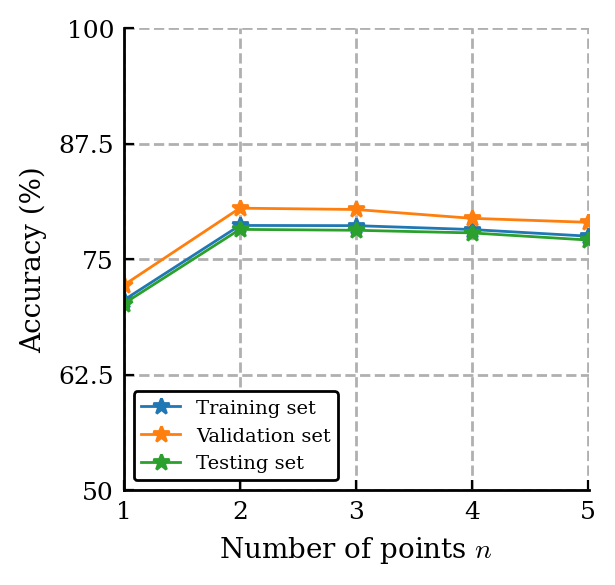

In [5]:
utility_figures.influence_of_number_of_points_of_interest(list_of_n_points=list_of_n_points, perform_train=Acc_train, perform_val=Acc_val, perform_test=Acc_test, situation=situation_1, perform='Accuracy', flag='clf', learning_type_flag='Chosen', lang='en')


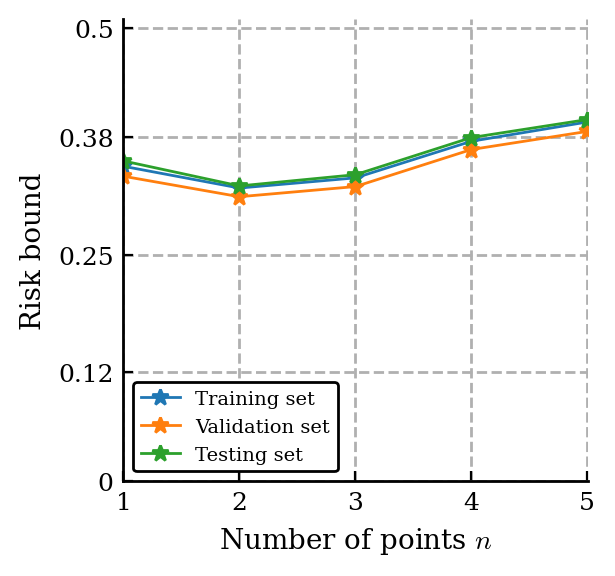

In [6]:
utility_figures.influence_of_number_of_points_of_interest(list_of_n_points=list_of_n_points, perform_train=Risk_train, perform_val=Risk_val, perform_test=Risk_test, situation=situation_1, perform='Bound', flag='clf', learning_type_flag='Chosen', lang='en')


##### Situation 2

In [9]:
X0_2_enc, lambda_param_, W_, w_ext_, MU_, mu_ext_, K_, TAU_, BETA_, summary_, X_train_, X_test_, Mat_dists_train_, Mat_dists_test_, ytrain_true_, ytest_true_, ytrain_pred_, ytest_pred_ = Algorithm_of_MoTLM_with_known_points_of_interest.Mixture_clf(df_2.copy(), target_name, X0_2, synthetic_data_flag=True, train_size=train_size, lr=lr, lambda_param=lambda_param, max_iters=max_iters, lambda_validation=lambda_validation, times=times, return_flag=return_flag)


***************** Mixtures of transparent local models with known points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, class_weights = None, lambda_validation = True, times = 10


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [16:33<00:00, 58.43s/it]
For Random Data Split = 10 …:  10%|█         | 1/10 [16:35<2:29:18, 995.42s/it]

W = [[ 0.15213167  3.29474058]
 [ 0.02765506  0.77190693]
 [-0.09375423  3.08064093]], MU = [0.07681  0.973466 0.19853 ], lambda_param = 290.3333333333333
w_ext = [-0.09125148 -3.55268331], mu_ext = -0.041462
SIGMA = [0.35218  0.437007 0.376426], sigma_ext = 0.449098


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [16:24<00:00, 57.89s/it]
For Random Data Split = 10 …:  20%|██        | 2/10 [33:02<2:12:05, 990.63s/it]

W = [[2.72916595e-01 6.48122821e+00]
 [4.60504405e-02 1.02533287e+00]
 [4.18906349e-03 6.25640349e+00]], MU = [0.285584 1.336498 0.199562], lambda_param = 1451.6666666666665
w_ext = [-0.08040592 -5.27804002], mu_ext = -0.140598
SIGMA = [0.247049 0.435117 0.278165], sigma_ext = 0.391625


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [14:51<00:00, 52.42s/it]
For Random Data Split = 10 …:  30%|███       | 3/10 [47:55<1:50:22, 946.04s/it]

W = [[0.19026587 4.61144729]
 [0.02385694 0.91833713]
 [0.15215735 4.58365364]], MU = [0.186411 1.131706 0.015311], lambda_param = 580.6666666666666
w_ext = [-0.02370152 -4.12336042], mu_ext = -0.095405
SIGMA = [0.30639  0.421383 0.292353], sigma_ext = 0.439989


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [06:48<00:00, 24.04s/it]
For Random Data Split = 10 …:  40%|████      | 4/10 [54:45<1:13:25, 734.26s/it]

W = [[0.35570186 5.99747164]
 [0.01894634 1.05084629]
 [0.03032013 6.01373442]], MU = [0.322304 1.282501 0.142654], lambda_param = 1233.9166666666665
w_ext = [-0.11824681 -4.91353418], mu_ext = -0.216486
SIGMA = [0.182439 0.372153 0.232469], sigma_ext = 0.292979


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [05:25<00:00, 19.17s/it]
For Random Data Split = 10 …:  50%|█████     | 5/10 [1:00:11<48:56, 587.26s/it]

W = [[ 0.12068327  5.97554183]
 [ 0.02111155  1.07938421]
 [-0.02947123  6.19707929]], MU = [0.020148 1.355096 0.104144], lambda_param = 1233.9166666666665
w_ext = [-0.03622752 -4.51392388], mu_ext = -0.077632
SIGMA = [0.406769 0.534149 0.434285], sigma_ext = 0.458788


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [05:23<00:00, 19.04s/it]
For Random Data Split = 10 …:  60%|██████    | 6/10 [1:05:36<33:11, 497.95s/it]

W = [[4.46679141e-01 6.38066059e+00]
 [1.99587681e-03 1.06352506e+00]
 [2.32867499e-01 6.39269101e+00]], MU = [ 4.760540e-01  1.333085e+00 -3.320000e-04], lambda_param = 1451.6666666666665
w_ext = [-0.00907904 -5.1386922 ], mu_ext = -0.154887
SIGMA = [0.251306 0.442127 0.278933], sigma_ext = 0.411554


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [05:30<00:00, 19.45s/it]
For Random Data Split = 10 …:  70%|███████   | 7/10 [1:11:07<22:10, 443.46s/it]

W = [[0.09742559 3.77283503]
 [0.05596435 0.86358095]
 [0.10191426 3.58033123]], MU = [-0.014108  1.069475 -0.130362], lambda_param = 362.91666666666663
w_ext = [-0.11735023 -3.67174548], mu_ext = -0.099861
SIGMA = [0.369226 0.43406  0.37878 ], sigma_ext = 0.447404


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [05:28<00:00, 19.30s/it]
For Random Data Split = 10 …:  80%|████████  | 8/10 [1:16:36<13:33, 406.98s/it]

W = [[ 0.02465082  5.39124711]
 [-0.01461765  1.02683173]
 [ 0.05632377  5.35460365]], MU = [-0.185987  1.319447  0.110064], lambda_param = 871.0
w_ext = [-0.08589334 -4.35666857], mu_ext = -0.062906
SIGMA = [0.343054 0.529441 0.335428], sigma_ext = 0.453769


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [06:27<00:00, 22.79s/it]
For Random Data Split = 10 …:  90%|█████████ | 9/10 [1:23:05<06:41, 401.23s/it]

W = [[ 0.21244467  6.63911997]
 [ 0.03477795  0.94864884]
 [-0.1826909   6.28977887]], MU = [0.165917 1.201824 0.318366], lambda_param = 1451.6666666666665
w_ext = [-0.2172082  -5.03539206], mu_ext = -0.132283
SIGMA = [0.213063 0.249895 0.162258], sigma_ext = 0.152702


Tuning Lambda (30 random restarts for each lambda) : 100%|██████████| 17/17 [06:49<00:00, 24.07s/it]
For Random Data Split = 10 …: 100%|██████████| 10/10 [1:29:55<00:00, 539.53s/it]

W = [[2.45534384e-01 6.17290319e+00]
 [2.64999927e-03 9.39374866e-01]
 [5.15418331e-02 6.11925817e+00]], MU = [0.176879 1.212724 0.239027], lambda_param = 1233.9166666666665
w_ext = [ 3.16210152e-03 -4.72655378e+00], mu_ext = -0.128075
SIGMA = [0.273458 0.330759 0.211305], sigma_ext = 0.283362


In [10]:
summary_

,Accuracy,F1_score,Precision_score,Gibbs_risk,Risk_bound,Std_accuracy
Training set,97.657,97.720,96.669,0.1592,0.2320,0.3784
Validation set,98.023,98.084,97.021,0.1614,0.2342,0.9595
Testing set,96.685,96.781,95.678,0.1640,0.2368,1.2141


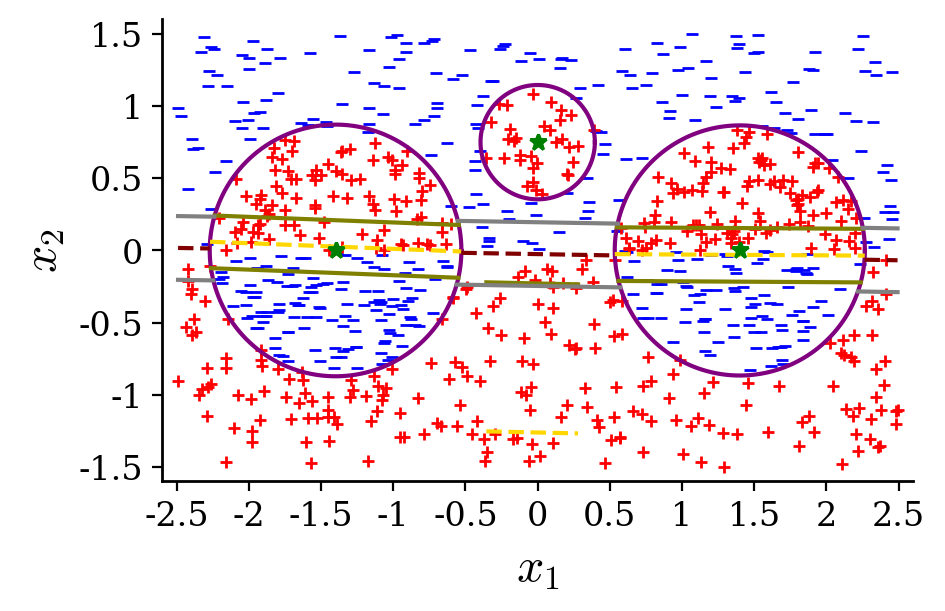

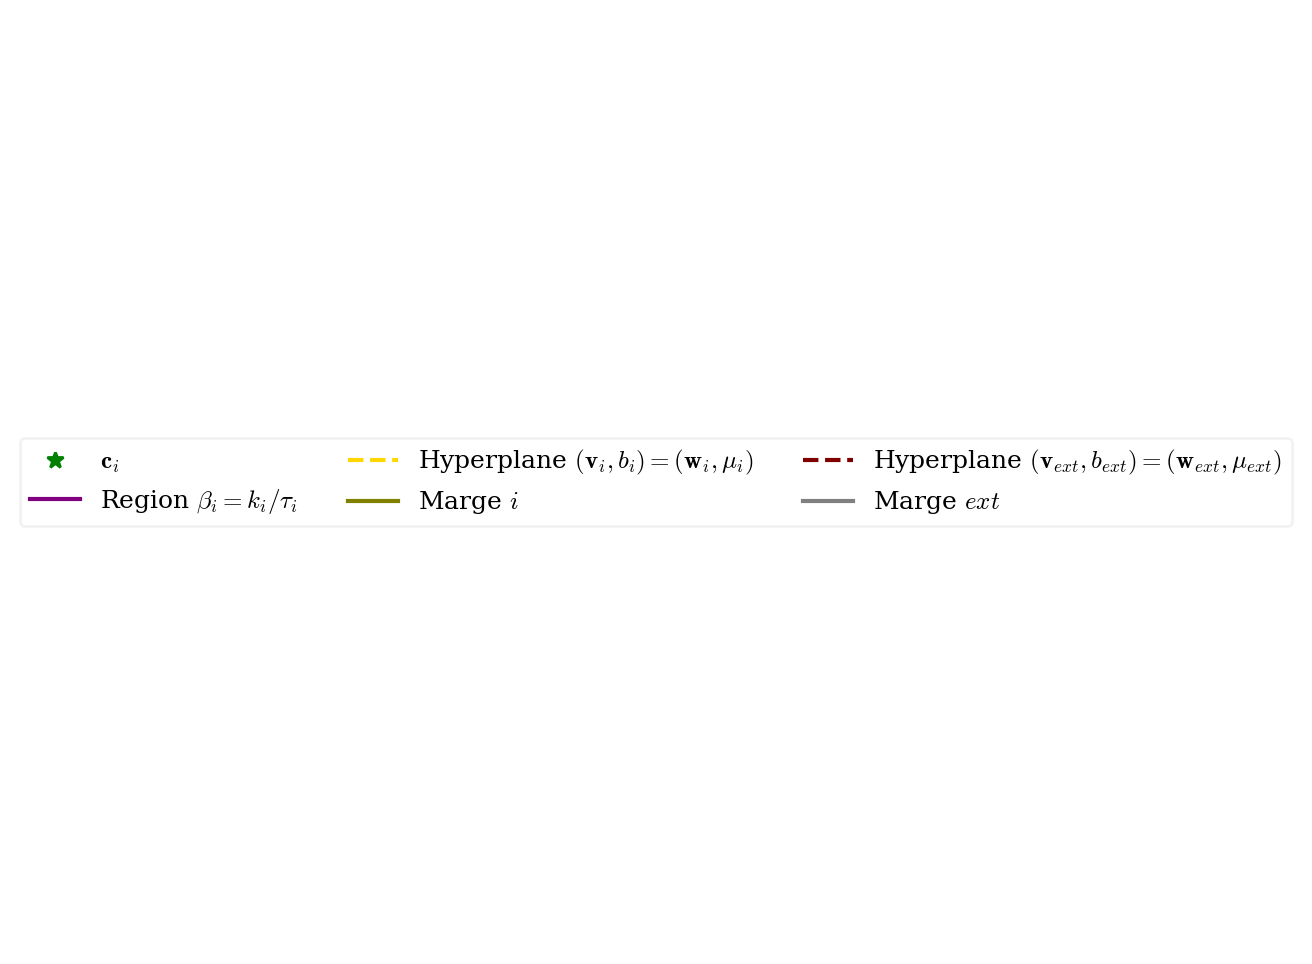

In [11]:
utility_figures.visualize_hybrid_hyperplane_gn(X=X_train_, y=ytrain_true_, Xcenter=X0_2_enc, dist_type='euclidean', Mat_dists=Mat_dists_train_, V=W_, v_ext=w_ext_, B=MU_, b_ext=mu_ext_, BETA=BETA_, situation=situation_2, jeu='Jeu d\'entraînement', option=False, learning_type_flag='Chosen', lang='en')

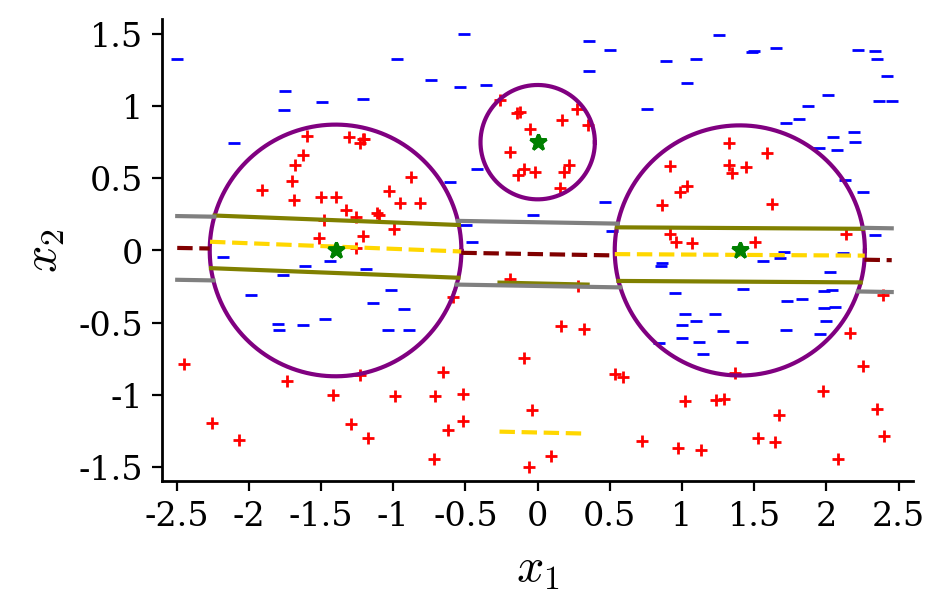

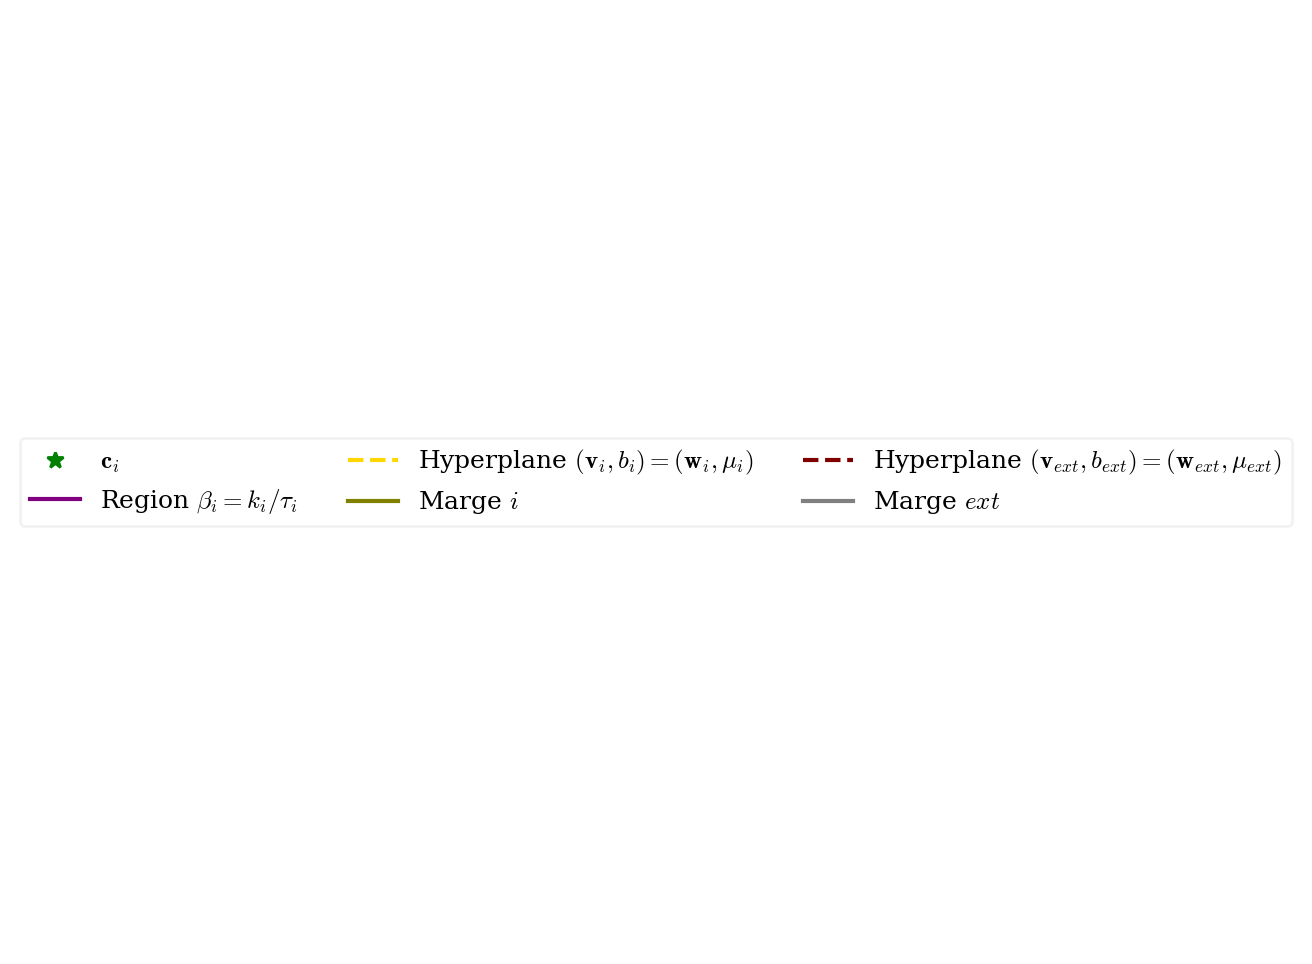

In [12]:
utility_figures.visualize_hybrid_hyperplane_gn(X=X_test_, y=ytest_true_, Xcenter=X0_2_enc, dist_type='euclidean', Mat_dists=Mat_dists_test_, V=W_, v_ext=w_ext_, B=MU_, b_ext=mu_ext_, BETA=BETA_, situation=situation_2, jeu='Jeu de test', option=False, learning_type_flag='Chosen', lang='en')

### 3. Linear regression

#### 3.1. Generate Synthetic Data

In [ ]:
Ntrials = 500
df_1, target_name, X0_1, Y0_1, BETA_1, situation_1 = utility_figures.DataGenerating_reg(Case=1, Ntrials=Ntrials, lang='en')
utility_figures.PlotDistribution_Synthetic_data_reg_gn(data=df_1, Xc=X0_1.values, Yc=Y0_1, situation=situation_1, learning_type_flag='Chosen', lang='en')

In [ ]:
Ntrials = 500
df_2, target_name, X0_2, Y0_2, BETA_2, situation_2 = utility_figures.DataGenerating_reg(Case=2, Ntrials=Ntrials, lang='en')
utility_figures.PlotDistribution_Synthetic_data_reg_gn(data=df_2, Xc=X0_2.values, Yc=Y0_2, situation=situation_2, learning_type_flag='Chosen', lang='en')

#### 3.2. Single Model (Linear regression)

##### Parameters Setting

In [ ]:
train_size=0.70
C_param=100
C_validation=True
times=10 #times

##### Situation 1

In [ ]:
summary = sklearn_models.kernel_regression(df_1.copy(), target_name, synthetic_data_flag=True, train_size=train_size, kernel='rbf', C_param=C_param, C_validation=C_validation, times=times, return_flag='simple')
summary

In [ ]:
w, b, summary, X_tr, X_tt, ytrain_true, ytest_true, ytrain_pred, ytest_pred = sklearn_models.linear_regression(df_1.copy(), target_name, synthetic_data_flag=True, train_size=train_size, times=times, return_flag='complex')
summary

In [ ]:
xmin, xmax, ymin, ymax = utility_figures.get_xlimit_ylimit(X=X_tr, y=ytrain_true, w=w, b=b)
utility_figures.visualize_lr_reg_gn(X=X_tr, y=ytrain_true, Xc=X0_1.values, Yc=Y0_1, w=w, b=b, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, situation=situation_1, jeu='Apprentissage', lang='en')


In [ ]:
utility_figures.visualize_lr_reg_gn(X=X_tt, y=ytest_true, Xc=X0_1.values, Yc=Y0_1, w=w, b=b, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, situation=situation_1, jeu='Tester', lang='en')

##### Situation 2

In [ ]:
summary_ = sklearn_models.kernel_regression(df_2.copy(), target_name, synthetic_data_flag=True, train_size=train_size, kernel='rbf', C_param=C_param, C_validation=C_validation, times=times, return_flag='simple')
summary_

In [ ]:
w_, b_, summary_, X_tr_, X_tt_, ytrain_true_, ytest_true_, ytrain_pred_, ytest_pred_ = sklearn_models.linear_regression(df_2.copy(), target_name, synthetic_data_flag=True, train_size=train_size, times=times, return_flag='complex')
summary_

In [ ]:
xmin_, xmax_, ymin_, ymax_ = utility_figures.get_xlimit_ylimit(X=X_tr_, y=ytrain_true_, w=w_, b=b_)
utility_figures.visualize_lr_reg_gn(X=X_tr_, y=ytrain_true_, Xc=X0_2.values, Yc=Y0_2, w=w_, b=b_, xmin=xmin_, xmax=xmax_, ymin=ymin_, ymax=ymax_, situation=situation_2, jeu='Apprentissage', lang='en')

In [ ]:
utility_figures.visualize_lr_reg_gn(X=X_tt_, y=ytest_true_, Xc=X0_2.values, Yc=Y0_2, w=w_, b=b_, xmin=xmin_, xmax=xmax_, ymin=ymin_, ymax=ymax_, situation=situation_2, jeu='Tester', lang='en')

#### 3.3. Generalization Of Mixture Of Linear Experts Into Many Regions

##### Parameters Setting

In [ ]:
train_size=0.70
lr=0.1
lambda_param=100
max_iters=2000
lambda_validation=True
times=times
return_flag='complex'

##### Situation 1

In [ ]:
X0_1_enc, lambda_param, W, w_ext, MU, mu_ext, K, TAU, BETA, summary, X_train, X_test, Mat_dists_train, Mat_dists_test, ytrain_true, ytest_true, ytrain_pred, ytest_pred = Algorithm_of_MoTLM_with_known_points_of_interest.Mixture_reg(df_1.copy(), target_name, X0_1, synthetic_data_flag=True, train_size=train_size, lr=lr, lambda_param=lambda_param, max_iters=max_iters, lambda_validation=lambda_validation, times=times, return_flag=return_flag)


In [ ]:
summary

In [ ]:
ytrain_std = numpy.std(ytrain_true)
xmin, xmax, ymin, ymax = utility_figures.get_xlimit_ylimit_hybrid_gn(X=X_train, y=ytrain_true, y_train_std=ytrain_std, Xc=X0_1_enc, dist_type='euclidean', Mat_dists=Mat_dists_train, V=W, v_ext=w_ext, B=MU, b_ext=mu_ext, BETA=BETA)
utility_figures.visualize_hybrid_lr_reg_gn(X=X_train, y=ytrain_true, y_train_std=ytrain_std, Xc=X0_1_enc, Yc=Y0_1, dist_type='euclidean', Mat_dists=Mat_dists_train, V=W, v_ext=w_ext, B=MU, b_ext=mu_ext, BETA=BETA, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, situation=situation_1, jeu='Apprentissage', learning_type_flag='Chosen', lang='en')

In [ ]:
utility_figures.visualize_hybrid_lr_reg_gn(X=X_test, y=ytest_true, y_train_std=ytrain_std, Xc=X0_1_enc, Yc=Y0_1, dist_type='euclidean', Mat_dists=Mat_dists_test, V=W, v_ext=w_ext, B=MU, b_ext=mu_ext, BETA=BETA, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, situation=situation_1, jeu='Tester', learning_type_flag='Chosen', lang='en')

##### Situation 2

In [ ]:
X0_2_enc, lambda_param_, W_, w_ext_, MU_, mu_ext_, K_, TAU_, BETA_, summary_, X_train_, X_test_, Mat_dists_train_, Mat_dists_test_, ytrain_true_, ytest_true_, ytrain_pred_, ytest_pred_ = Algorithm_of_MoTLM_with_known_points_of_interest.Mixture_reg(df_2.copy(), target_name, X0_2, synthetic_data_flag=True, train_size=train_size, lr=lr, lambda_param=lambda_param, max_iters=max_iters, lambda_validation=lambda_validation, times=times, return_flag=return_flag)


In [ ]:
summary_

In [ ]:
ytrain_std_ = numpy.std(ytrain_true_)
xmin_, xmax_, ymin_, ymax_ = utility_figures.get_xlimit_ylimit_hybrid_gn(X=X_train_, y=ytrain_true_, y_train_std=ytrain_std_, Xc=X0_2_enc, dist_type='euclidean', Mat_dists=Mat_dists_train_, V=W_, v_ext=w_ext_, B=MU_, b_ext=mu_ext_, BETA=BETA_)
utility_figures.visualize_hybrid_lr_reg_gn(X=X_train_, y=ytrain_true_, y_train_std=ytrain_std_, Xc=X0_2_enc, Yc=Y0_2, dist_type='euclidean', Mat_dists=Mat_dists_train_, V=W_, v_ext=w_ext_, B=MU_, b_ext=mu_ext_, BETA=BETA_, xmin=xmin_, xmax=xmax_, ymin=ymin_, ymax=ymax_, situation=situation_2, jeu='Apprentissage', learning_type_flag='Chosen', lang='en')

In [ ]:
utility_figures.visualize_hybrid_lr_reg_gn(X=X_test_, y=ytest_true_, y_train_std=ytrain_std_, Xc=X0_2_enc, Yc=Y0_2, dist_type='euclidean', Mat_dists=Mat_dists_test_, V=W_, v_ext=w_ext_, B=MU_, b_ext=mu_ext_, BETA=BETA_, xmin=xmin_, xmax=xmax_, ymin=ymin_, ymax=ymax_, situation=situation_2, jeu='Tester', learning_type_flag='Chosen', lang='en')